In [1]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

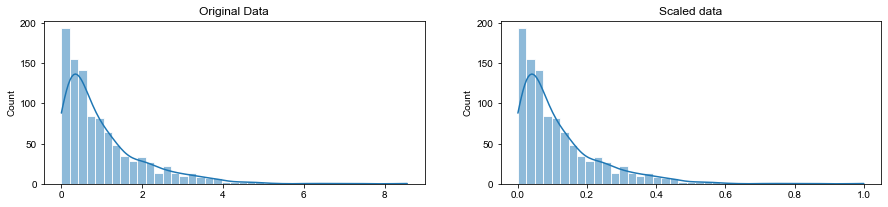

In [2]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.set_style("whitegrid")
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

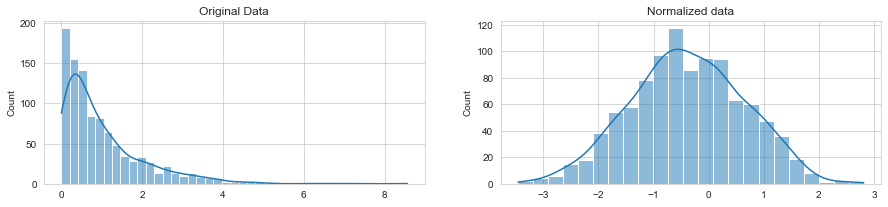

In [3]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

In [4]:
# read in all our data
kickstarters_2017 = pd.read_csv("C:/installed/python-learning/Courses/data-cleaning/ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(0)

# select the usd_goal_real column
original_data = pd.DataFrame(kickstarters_2017.usd_goal_real)

# scale the goals from 0 to 1
scaled_data = minmax_scaling(original_data, columns=['usd_goal_real'])

print('Original data\nPreview:\n', original_data.head())
print('Minimum value:', float(original_data.min()),
      '\nMaximum value:', float(original_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()),
      '\nMaximum value:', float(scaled_data.max()))

Original data
Preview:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum value: 0.75 
Maximum value: 33000000.0
______________________________

Scaled data
Preview:
    usd_goal_real
0       0.000046
1       0.000909
2       0.001364
3       0.000151
4       0.000591
Minimum value: 0.0 
Maximum value: 1.0


In [5]:
# select the usd_goal_real column
original_goal_data = pd.DataFrame(kickstarters_2017.goal)
#original_goal_data.head()
# scale the goal data
scaled_goal_data = minmax_scaling(original_goal_data, columns=['goal'])

scaled_goal_data.head()

,goal
0,0.000025
1,0.000750
2,0.001125
3,0.000125
4,0.000487


In [6]:
# get the index of all positive USD pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# get only positive USD pledges (using their indexes)
positive_USD_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the USD pledges (w/ Box-Cox)
normalized_USD_pledges = pd.Series(stats.boxcox(positive_USD_pledges)[0], 
                               name='usd_pledged_real', index=positive_pledges.index)

print('Original data\nPreview:\n', positive_USD_pledges.head())
print('Minimum value:', float(positive_USD_pledges.min()),
      '\nMaximum value:', float(positive_USD_pledges.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_USD_pledges.head())
print('Minimum value:', float(normalized_USD_pledges.min()),
      '\nMaximum value:', float(normalized_USD_pledges.max()))

NameError: name 'positive_pledges' is not defined

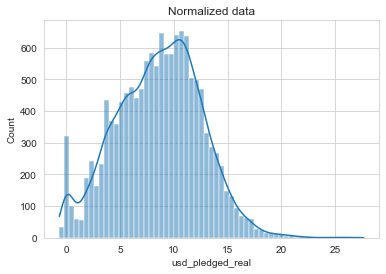

In [ ]:
# plot normalized data
ax = sns.histplot(normalized_USD_pledges, kde=True)
ax.set_title("Normalized data")
plt.show()

Text(0.5, 1.0, 'Normalized data')

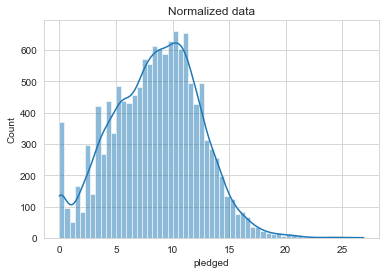

In [ ]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.pledged > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.pledged.loc[index_of_positive_pledges]

positive_pledges = kickstarters_2017.pledged.loc[index_of_positive_pledges]

normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], 
                               name='pledged', index=positive_pledges.index)

# plot normalized data
ax = sns.histplot(normalized_pledges, kde=True)
ax.set_title("Normalized data")